In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

# Loading the data

In [2]:
data = []
labels = []
classes = 43
currentPath = os.getcwd()

for i in range(classes):
    path = os.path.join(currentPath, 'Train', str(i)) # folder Train
    imagesFileNameList = os.listdir(path)

    for a in imagesFileNameList:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)

            data.append(image)
            labels.append(i) 
        except:
            print('error loading image')

data = np.array(data)
labels = np.array(labels)

In [3]:
data.shape
# 39209 image
# size 30*30
# 3 means RGB

(39209, 30, 30, 3)

In [4]:
labels.shape

(39209,)

# Spilt data

In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(data, labels, test_size=0.2, random_state=0)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

# processing label data
yTrain = to_categorical(yTrain, 43)
yTest = to_categorical(yTest, 43)
print(yTrain[0])

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Build a CNN Model

In [6]:
model = Sequential()

# Convolution
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape = xTrain.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
# Fully connected NN
model.add(Dense(256, activation='relu'))
model.add(Dense(43, activation='softmax'))

# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train and validate

In [7]:
epoch = 15
history = model.fit(xTrain, yTrain, batch_size = 64, epochs=epoch, validation_data=(xTest, yTest))

Epoch 1/15
491/491 [==============================] - 23s 7ms/step - loss: 2.4003 - accuracy: 0.4658 - val_loss: 0.3473 - val_accuracy: 0.9165
Epoch 2/15
491/491 [==============================] - 3s 6ms/step - loss: 0.2247 - accuracy: 0.9419 - val_loss: 0.1588 - val_accuracy: 0.9605
Epoch 3/15
491/491 [==============================] - 3s 5ms/step - loss: 0.1097 - accuracy: 0.9724 - val_loss: 0.1531 - val_accuracy: 0.9649
Epoch 4/15
491/491 [==============================] - 3s 5ms/step - loss: 0.1010 - accuracy: 0.9756 - val_loss: 0.1216 - val_accuracy: 0.9717
Epoch 5/15
491/491 [==============================] - 3s 6ms/step - loss: 0.0740 - accuracy: 0.9821 - val_loss: 0.1823 - val_accuracy: 0.9560
Epoch 6/15
491/491 [==============================] - 3s 6ms/step - loss: 0.0945 - accuracy: 0.9767 - val_loss: 0.0918 - val_accuracy: 0.9805
Epoch 7/15
491/491 [==============================] - 3s 6ms/step - loss: 0.0569 - accuracy: 0.9870 - val_loss: 0.1988 - val_accuracy: 0.9652
Epoch

# plot 

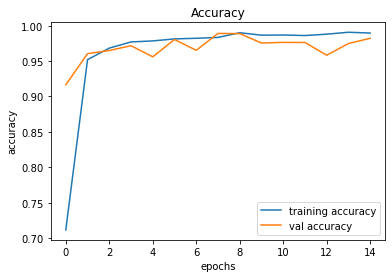

In [8]:
plt.figure(1)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()



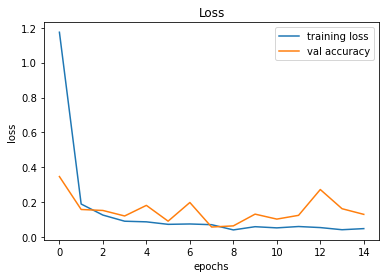

In [9]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val accuracy')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

# Test our model with test dataset

In [10]:
df = pd.read_csv('Test.csv')

yTest = df.ClassId.values
imgAddress = df.Path.values

data = []

for im in imgAddress:
    image = Image.open(im)
    image = image.resize((30,30))
    data.append(np.array(image))

xTest = np.array(data)


In [11]:
xTest.shape

(12630, 30, 30, 3)

In [11]:
yPred = model.predict_classes(xTest)

# Accuracy
accuracy_score(yTest, yPred)


C:\Users\Lee\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.946159936658749

# Save model

In [12]:
model.save('model.h5')